In [3]:
import fbma
import pandas as pd

In [4]:
fbma.msgs.head()

,Unnamed: 0,members,sender,text,time
0,0,"['Kevin Wang', 'Walton Wu']",Kevin Wang,don't take calcium supplements,2011-06-13 21:20:00
1,1,"['Kevin Wang', 'Walton Wu']",Kevin Wang,my doctor was all,2011-06-13 21:20:00
2,2,"['Kevin Wang', 'Walton Wu']",Kevin Wang,i dunno,2011-06-13 21:20:00
3,3,"['Kevin Wang', 'Walton Wu']",Kevin Wang,asdf,2011-06-13 21:18:00
4,4,"['Kevin Wang', 'Walton Wu']",Walton Wu,lol,2011-06-13 21:18:00


In [5]:
%matplotlib inline

In [6]:
msgs = fbma.msgs

In [7]:
kevin = msgs[msgs['sender'] == "Kevin Wang"]

In [8]:
kevin.head()

,Unnamed: 0,members,sender,text,time
0,0,"['Kevin Wang', 'Walton Wu']",Kevin Wang,don't take calcium supplements,2011-06-13 21:20:00
1,1,"['Kevin Wang', 'Walton Wu']",Kevin Wang,my doctor was all,2011-06-13 21:20:00
2,2,"['Kevin Wang', 'Walton Wu']",Kevin Wang,i dunno,2011-06-13 21:20:00
3,3,"['Kevin Wang', 'Walton Wu']",Kevin Wang,asdf,2011-06-13 21:18:00
7,7,"['Kevin Wang', 'Walton Wu']",Kevin Wang,lol,2011-06-13 21:18:00


In [9]:
others = msgs[msgs['sender'] != "Kevin Wang"]

In [10]:
others.head()

,Unnamed: 0,members,sender,text,time
4,4,"['Kevin Wang', 'Walton Wu']",Walton Wu,lol,2011-06-13 21:18:00
5,5,"['Kevin Wang', 'Walton Wu']",Walton Wu,lt helps,2011-06-13 21:18:00
6,6,"['Kevin Wang', 'Walton Wu']",Walton Wu,want some calcium pills?,2011-06-13 21:18:00
9,9,"['Kevin Wang', 'Walton Wu']",Walton Wu,l'm pretty much recovered,2011-06-13 21:18:00
10,10,"['Kevin Wang', 'Walton Wu']",Walton Wu,l'm surprised you aren't recovered,2011-06-13 21:18:00


In [11]:
from collections import Counter
def make_words(df, case_sensitive = False):
    words = Counter()
    txt = df["text"]
    if case_sensitive == False:
        txt = txt.str.lower()
    #print(txt.str.split())
    txt.str.split().apply(words.update)
    return words

In [12]:
kevin = kevin[1:]

In [13]:
others[others.text.isnull()]
#kevin[kevin.text.isnull()]

,Unnamed: 0,members,sender,text,time


In [14]:
kwords = make_words(kevin)
owords = make_words(others)

In [15]:
#kwords

In [16]:
def laugh_words(words):
    for word, amount in sorted(words.items(), key=lambda x: x[1], reverse = True):
        if (set(word) in ({"h", "a"}, {"l", "o"})) or (word[:4] == "rofl"):
            if word not in {'ah'}:
                yield (word, amount)

In [17]:
lwords = pd.DataFrame(list(laugh_words(kwords)))

In [18]:
lwords.head()

,0,1
0,lol,7628
1,haha,1004
2,rofl,560
3,hahaha,342
4,hahahaha,267


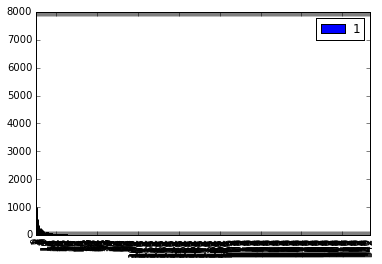

In [19]:
lwords.plot(kind="bar")

In [20]:
lwords

,0,1
0,lol,7628
1,haha,1004
2,rofl,560
3,hahaha,342
4,hahahaha,267
5,lololol,245
6,lolololol,206
7,hahahahah,168
8,hahahah,142
9,lollll,124


In [21]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [22]:
print_full(lwords)

                                                     0     1
0                                                  lol  7628
1                                                 haha  1004
2                                                 rofl   560
3                                               hahaha   342
4                                             hahahaha   267
5                                              lololol   245
6                                            lolololol   206
7                                            hahahahah   168
8                                              hahahah   142
9                                               lollll   124
10                                          hahahahaha   121
11                                         lololololol    93
12                                         hahahahahah    92
13                                             lolllll    76
14                                               lolll    66
15                      

In [23]:
type(kwords)

collections.Counter

In [24]:
sum(kwords.values())

594772

In [25]:
lwords[1].sum()

12426

In [26]:
lwords[1].sum()/sum(kwords.values())
#proportion of the words that I say that are laughter

0.020892039302455395

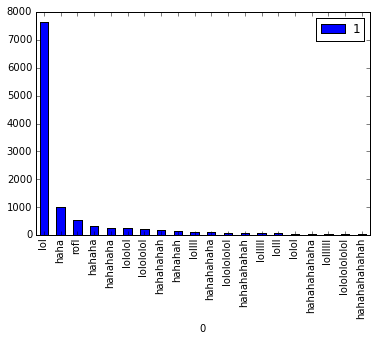

In [27]:
lwords = lwords.set_index(0)
lwords[:20].plot(kind="bar")

In [28]:
#x = lwords[:20].plot(kind="bar")
#x.set_xticklabels(lwords[0])

In [29]:
their_lwords = pd.DataFrame(list(laugh_words(owords))).set_index(0)

In [30]:
their_lwords.head()

,1
0,
lol,29162
haha,3299
hahaha,979
lololol,854
lolol,798


In [31]:
their_lwords

,1
0,
lol,29162
haha,3299
hahaha,979
lololol,854
lolol,798
rofl,458
hahah,399
hahahaha,323
lolololol,312


In [32]:
"lol" in lwords

False

In [33]:
"lol" in lwords.index

True

In [34]:
only_others_laugh = their_lwords[~their_lwords.index.isin(lwords.index)]
len(only_others_laugh)

420

In [35]:
only_me_laugh = lwords[~lwords.index.isin(their_lwords.index)]
len(only_me_laugh)

179

In [36]:
both_laugh = lwords[lwords.index.isin(their_lwords.index)]
len(lwords[lwords.index.isin(their_lwords.index)]), len(their_lwords[their_lwords.index.isin(lwords.index)])

(164, 164)

In [37]:
only_me_laugh

,1
0,
lollllllllllllll,11
hahahahaahah,9
ololololol,7
lolllllllllllllllll,7
lolllllllllllllllllllllllll,6
lollllllllllllllllllll,6
lollllllllllllllllllllllll,5
roflroflrofl,5
lollllllllllllllllllllll,5


In [38]:
only_others_laugh

,1
0,
ahaha,211
hahha,56
looll,28
loollo,26
ahha,21
looooooool,20
loooooool,18
hahahhaa,16
loololl,16


In [39]:
res = lwords[lwords.index.isin(their_lwords.index)].merge(their_lwords[their_lwords.index.isin(lwords.index)], left_index=True, right_index=True)
res

,1_x,1_y
0,,
lol,7628,29162
haha,1004,3299
hahaha,342,979
lololol,245,854
lolol,60,798
rofl,560,458
hahah,20,399
hahahaha,267,323
lolololol,206,312


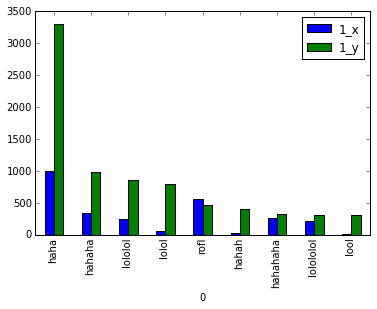

In [48]:
res[1:10].plot(kind="bar")

In [41]:
#kwords

In [42]:
len(kwords)

39356

In [43]:
len(owords)

107485

In [54]:
%%time
#b = DataFrame(msgs.text.str.split(',').tolist(), index=a.var2).stack()
wordlist = []
for index, row in msgs.iterrows():
    for word in row.text.split():
        wordlist.append({"word": word, "sender": row.sender, "members": row.members, "time": row.time})

Wall time: 2min 2s


In [55]:
words = pd.DataFrame(wordlist)

In [83]:
urls = words[words.word.str.startswith("http")]
urlbases = urls.word.str.split("/").apply(lambda x: x[2] if len(x) > 3 else None)
myurlbases = urlbases[urls.sender == "Kevin Wang"]
len(myurlbases.value_counts())

503

In [84]:
#msgs.members.value_counts()